<a href="https://colab.research.google.com/github/nishantkapps/aiml-projects/blob/main/Denoising_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import Layer
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import  Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils

## **Read MNIST data and preprocess data to the format needed by Autoencoder**

In [ ]:
# Load the data mnist
# We do not need labels as autoencoder is unsupervised network
# for this, we are using _ instead of y_train/y_test
(x_train, _), (x_test, _)=mnist.load_data()
x_train.shape

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

In [ ]:
# Reshape to add channel - for GrayScale images from MNIST, channel is 1
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

In [ ]:
# Normalize the data pixel values to be in 0 to 1 range
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

In [ ]:
# Flatten the images for fully connected layer (all 784 (28X28) pixels need to go as input)
x_train = x_train.reshape(x_train.shape[0],np.prod(x_train.shape[1:]))
x_test = x_test.reshape(x_test.shape[0],np.prod(x_test.shape[1:]))

## **Add noise to images**

In [ ]:
###  Create the noise
### -------------------------------------------------------------
###  1. New image with noise must have same dimensions
###  2. New image should follow the same distribution ( loc - Mean, scale - Std Dev )
###  3. Select Noise factor ( 0.0 - 1.0 )
noise_factor = 0.2
x_train_noisy = x_train+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_train.shape)
x_test_noisy = x_test+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy,0.,1.)
x_test_noisy = np.clip(x_test_noisy,0.,1.)

## **Design the Network**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
num_pixels=784

In [ ]:
# Create a model
model = Sequential()

# Encoder Network
model.add(Dense(500,input_dim=num_pixels,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(100,activation='relu'))

# Decoder Network
model.add(Dense(300,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(784,activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 300)               30300     
                                                                 
 dense_4 (Dense)             (None, 500)               150500    
                                                                 
 dense_5 (Dense)             (None, 784)               392784    
                                                                 
Total params: 1,146,484
Trainable params: 1,146,484
Non-

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
epochs=5
batch_size=200
history = model.fit(x_train_noisy,x_train, validation_data=(x_test_noisy,x_test), epochs=epochs, batch_size=batch_size)

Epoch 1/5
300/300 [==============================] - 1s 4ms/step - loss: 0.0107 - val_loss: 0.0098
Epoch 2/5
300/300 [==============================] - 1s 4ms/step - loss: 0.0096 - val_loss: 0.0090
Epoch 3/5
300/300 [==============================] - 1s 4ms/step - loss: 0.0088 - val_loss: 0.0083
Epoch 4/5
300/300 [==============================] - 1s 4ms/step - loss: 0.0082 - val_loss: 0.0080
Epoch 5/5
300/300 [==============================] - 1s 4ms/step - loss: 0.0077 - val_loss: 0.0075


In [ ]:
# final image
denoised_img = model.predict(x_test_noisy)

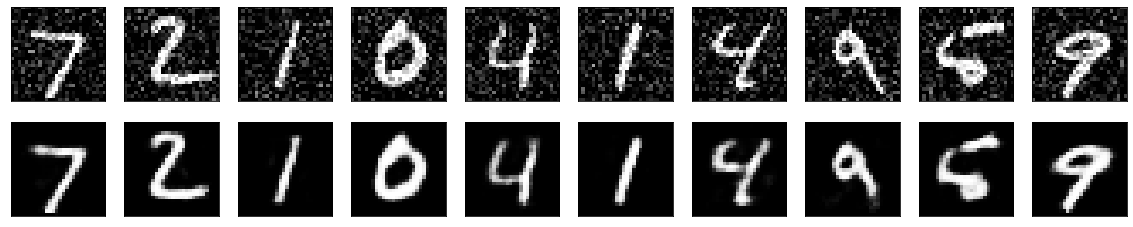

In [ ]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(denoised_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

## **Variational Auto Encoder (VAE)**

In [ ]:
# Autoencoder, RBN models are used for reconstructing images
# VAE / GAN can create new images ( Generative Adversarial Network is predominantly used to create new images )